In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

sns.set()

%matplotlib inline

# 01. Smooth function optimization

Рассмотрим все ту же функцию из задания по линейной алгебре:
$  f(x) = \sin{\frac{x}{5}} * e^{\frac{x}{10}} + 5 * e^{-\frac{x}{2}} $
, но теперь уже на промежутке `[1, 30]`.

В первом задании будем искать минимум этой функции на заданном промежутке с помощью `scipy.optimize`. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а `f(x)` мы рассмотрим как удобный учебный пример.

Напишите на Питоне функцию, вычисляющую значение `f(x)` по известному `x`. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции `sin` и `exp` нужно импортировать из модуля `math`.

In [2]:
from math import sin, exp, sqrt

def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

f(10)

2.5054164070002463

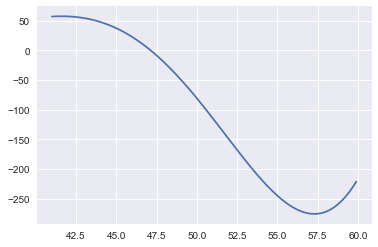

In [3]:
xs = np.arange(41, 60, 0.1)
ys = np.array([f(x) for x in xs])

plt.plot(xs, ys)

Изучите примеры использования `scipy.optimize.minimize` в документации `Scipy` (см. "Материалы").

Попробуйте найти минимум, используя стандартные параметры в функции `scipy.optimize.minimize` (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [4]:
from scipy.optimize import minimize, rosen, rosen_der, differential_evolution

In [5]:
x0 = 60
minimize(f, x0)

      fun: -275.34894180911255
 hess_inv: array([[0.07263322]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([57.29610943])

In [18]:
# поиграемся с розенброком
x0 = [1., 10.]
minimize(rosen, x0, method='BFGS')

      fun: 1.8442861105315944e-11
 hess_inv: array([[0.50847179, 1.0164149 ],
       [1.0164149 , 2.03679883]])
      jac: array([ 3.9986627e-06, -1.8129106e-06])
  message: 'Optimization terminated successfully.'
     nfev: 224
      nit: 45
     njev: 56
   status: 0
  success: True
        x: array([0.99999571, 0.9999914 ])

___

## Submission #1

Укажите в `scipy.optimize.minimize` в качестве метода `BFGS` (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения $ x = 2 $. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [24]:
# 1. x0 = 2
x0 = 2
res1 = minimize(f, x0, method='BFGS')

# 2. x0 = 30
x0 = 30
res2 = minimize(f, x0, method='BFGS')

with open('out/06. submission1.txt', 'w') as f_out:  
    output = '{0:.2f} {1:.2f}'.format(res1.fun, res2.fun)
    print(output)
    f_out.write(output)

1.75 -11.90


# 02. Глобальная оптимизация

Теперь попробуем применить к той же функции $ f(x) $ метод глобальной оптимизации — дифференциальную эволюцию.
Изучите документацию и примеры использования функции `scipy.optimize.differential_evolution`.

Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации `scipy.optimize.differential_evolution` длина этого списка используется чтобы определить количество аргументов функции.

Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [25]:
res = differential_evolution(f, [(1, 30)])
res

     fun: -11.898894665981048
     jac: array([5.32907052e-07])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([25.88019399])

___

## Submission #2

In [28]:
res = differential_evolution(f, [(1, 30)])

with open('out/06. submission2.txt', 'w') as f_out:  
    output = '{0:.2f}'.format(res.fun)
    print(output)
    f_out.write(output)

-11.90


# 03. Минимизация негладкой функции

Теперь рассмотрим функцию $ h(x) = int(f(x)) $ на том же отрезке `[1, 30]`, т.е. теперь каждое значение $ f(x) $ приводится к типу int и функция принимает только целые значения.

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график $ h(x) $ с помощью `matplotlib`.

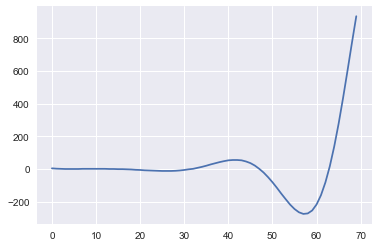

In [8]:
def h(x):
    return int(f(x))

xs = np.arange(0, 70, 1)
ys = [h(x) for x in xs]
plt.plot(xs, ys)

In [9]:
minimize(h, 40.3)

      fun: 55
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([40.3])

Попробуйте найти минимум функции $ h(x) $ с помощью BFGS, взяв в качестве начального приближения $ x = 30 $. Получившееся значение функции – ваш первый ответ в этой задаче.

In [32]:
res_bfgs = minimize(h, 30)
res_bfgs

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

Теперь попробуйте найти минимум $ h(x) $ на отрезке `[1, 30]` с помощью дифференциальной эволюции. Значение функции $ h(x) $ в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [33]:
res_diff_evol = differential_evolution(h, [(1, 30)])
res_diff_evol

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 62
     nit: 3
 success: True
       x: array([25.84759908])

Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

___

## Submission #3

In [35]:
with open('out/06. submission3.txt', 'w') as f_out:  
    output = '{0:.2f} {1:.2f}'.format(res_bfgs.fun, res_diff_evol.fun)
    print(output)
    f_out.write(output)

-5.00 -11.00


___

Дальше играюсь с визуализацией ф-ии розенброка

In [11]:
lb = -10
rb = 10
step = 0.2
gen_xs = np.arange(lb, rb, step)

xs = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-10, 10, 0.1))
ys = rosen(xs)
print(xs[0].shape, xs[1].shape, ys.shape)

(200, 20) (200, 20) (200, 20)


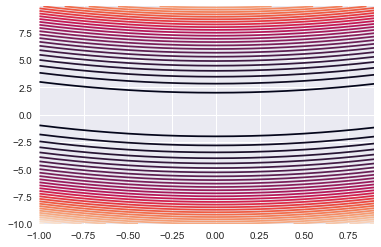

In [12]:
plt.contour(xs[0], xs[1], ys, 30)

(200, 40) (200, 40) (200, 40)


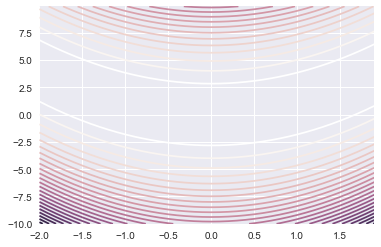

In [17]:
lb = 0
rb = 4
step = 0.3
gen_xs = np.arange(lb, rb, step)

#xs = np.meshgrid(gen_xs, gen_xs)
#ys = (xs[0]**2 + xs[1]**2)**0.5
xs = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-10, 10, 0.1))
ys = rosen(xs)
print(xs[0].shape, xs[1].shape, ys.shape)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.contour(xs[0], xs[1], ys, 30, cmap=cmap)
#plt.plot(xs[0], xs[1], marker='.', color='k', linestyle='none', alpha=0.1)
plt.show()

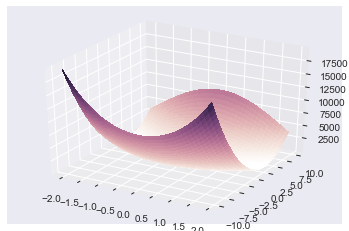

In [15]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xs[0], xs[1], ys, cmap=cmap, linewidth=0, antialiased=False)

plt.show()

In [16]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]


res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)
res.x

array([1.00000002, 1.00000002, 1.00000007, 1.00000015, 1.00000028])